In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# we wanna get the first <table> tag
#and then the second <table> tag class = t-chart
#<tbody> tag
# tr.evenrow (horizonal) are the even rows. You want to get the last one
# td.text_view_data gives the date and the amount of yield (13 columns)

In [ ]:
# plot. save figure
#each line can represent the month
#date on the x-axis
#

In [ ]:
#convert sting values to integers using pandas

In [11]:
def scrape():
    req = requests.get('https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=yield')
    content = req.text
    soup = BeautifulSoup(content, "lxml")
    
    treasury_table= soup.find("table", attrs={"class": "t-chart"})
    treasury_data = treasury_table.find_all("tr")
    
    
    header =["Date", "1Mo", "2Mo", "3Mo", "6Mo", "1Yr", "2Yr", "3Yr", "5Yr", "7Yr", "10Yr", "20Yr", "30Yr"]

    treasury_table= soup.find("table", attrs={"class": "t-chart"})
    

    trs = treasury_table.find_all("tr")

    data = []
    for tr in trs:
        tds = tr.findAll("td")
        row_empty=[]
        for td in tds:
            td_text = td.text.strip()
            row_empty.append(td_text)
        data.append(row_empty)
    final_data = data[1:]
    data_frame = pd.DataFrame(final_data, columns = header)
    data_frame[["1Mo", "2Mo", "3Mo", "6Mo", "1Yr", "2Yr", "3Yr", "5Yr", "7Yr", "10Yr", "20Yr", "30Yr"]] = data_frame[["1Mo", "2Mo", "3Mo", "6Mo", "1Yr", "2Yr", "3Yr", "5Yr", "7Yr", "10Yr", "20Yr", "30Yr"]].apply(pd.to_numeric)
    return data_frame



In [13]:
df =scrape()
df

,Date,1Mo,2Mo,3Mo,6Mo,1Yr,2Yr,3Yr,5Yr,7Yr,10Yr,20Yr,30Yr
0,04/01/21,0.02,0.02,0.02,0.04,0.06,0.17,0.35,0.90,1.37,1.69,2.24,2.34
1,04/02/21,0.02,0.02,0.02,0.04,0.07,0.19,0.39,0.97,1.42,1.72,2.27,2.35
2,04/05/21,0.03,0.02,0.03,0.04,0.06,0.17,0.37,0.94,1.40,1.73,2.28,2.36
3,04/06/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.88,1.34,1.67,2.24,2.32
4,04/07/21,0.01,0.02,0.02,0.04,0.06,0.16,0.34,0.87,1.34,1.68,2.26,2.35
5,04/08/21,0.02,0.02,0.01,0.04,0.05,0.14,0.33,0.85,1.30,1.64,2.22,2.32
6,04/09/21,0.02,0.01,0.02,0.03,0.06,0.16,0.35,0.87,1.33,1.67,2.23,2.34
7,04/12/21,0.02,0.02,0.02,0.04,0.06,0.18,0.38,0.89,1.35,1.69,2.24,2.34
8,04/13/21,0.03,0.02,0.03,0.05,0.06,0.16,0.35,0.85,1.29,1.64,2.21,2.32
9,04/14/21,0.02,0.02,0.02,0.04,0.06,0.16,0.35,0.87,1.31,1.64,2.22,2.32


TypeError: 'Series' objects are mutable, thus they cannot be hashed

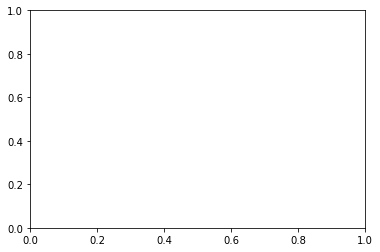

In [43]:
# multiple line plots
plt.plot(df["Date"], df["1Mo"], data=df, color ="red", label = "1Mo")
plt.plot(df["Date"], df["2Mo"], data=df, color ="blue", label = "2Mo")
plt.plot(df["Date"], df["3Mo"], data=df, color ="orange", label = "3Mo")
# show legend
plt.legend()

# show graph
plt.show()